In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print('number of images', x_train.shape[0])

number of images 60000


In [9]:
print("number of labels:", len(y_train))

number of labels: 60000


In [10]:
print('size of the test arrays:', x_test.shape[0])

size of the test arrays: 10000


In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
#Output 10 images

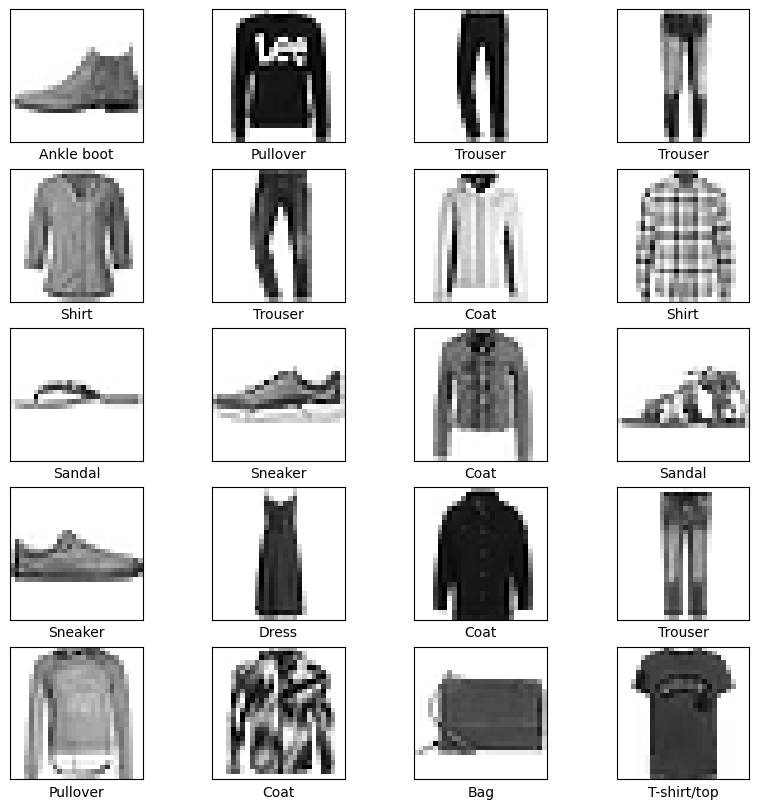

In [39]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [15]:
# Creating CNNs (Convolutional neural networks)
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
def CNNs_model(learning_rate, epochs, batch_size):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),        
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.10),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.20),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.30),
        
        layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.40),
        
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        restore_best_weights=True)
    
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping])

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    model.summary()
    
    return model, history

learning_rate = 0.001
epochs = 60
batch_size = 64
model, history_v1 = CNNs_model(learning_rate, epochs, batch_size)

Epoch 1/60
750/750 [==============================] - 23s 31ms/step - loss: 0.6143 - accuracy: 0.7786 - val_loss: 0.4238 - val_accuracy: 0.8576
Epoch 2/60
750/750 [==============================] - 23s 31ms/step - loss: 0.3993 - accuracy: 0.8585 - val_loss: 0.3476 - val_accuracy: 0.8723
Epoch 3/60
750/750 [==============================] - 24s 31ms/step - loss: 0.3504 - accuracy: 0.8768 - val_loss: 0.3079 - val_accuracy: 0.8903
Epoch 4/60
750/750 [==============================] - 24s 32ms/step - loss: 0.3129 - accuracy: 0.8907 - val_loss: 0.2915 - val_accuracy: 0.9001
Epoch 5/60
750/750 [==============================] - 24s 33ms/step - loss: 0.2948 - accuracy: 0.8966 - val_loss: 0.3600 - val_accuracy: 0.8716
Epoch 6/60
750/750 [==============================] - 24s 33ms/step - loss: 0.2764 - accuracy: 0.9021 - val_loss: 0.2890 - val_accuracy: 0.8997
Epoch 7/60
750/750 [==============================] - 24s 33ms/step - loss: 0.2643 - accuracy: 0.9075 - val_loss: 0.2742 - val_accuracy:

In [1]:
from tensorflow.keras.models import load_model

In [43]:
# Model from last homework with the best accuracy
old_model = load_model('../ds-hw-09/model_v1')
old_model.summary()

# Last model with the best accuracy from last homework
def fashion_mnist_model_v2(epochs=20, batch_size=32):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history
history_v2 = fashion_mnist_model_v2()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5430 - accuracy: 0.8066 - val_loss: 0.4544 - val_accuracy: 0.8368
Epoc

In [18]:
import matplotlib.pyplot as plt

313/313 [==============================] - 1s 4ms/step


<Figure size 3000x300 with 0 Axes>

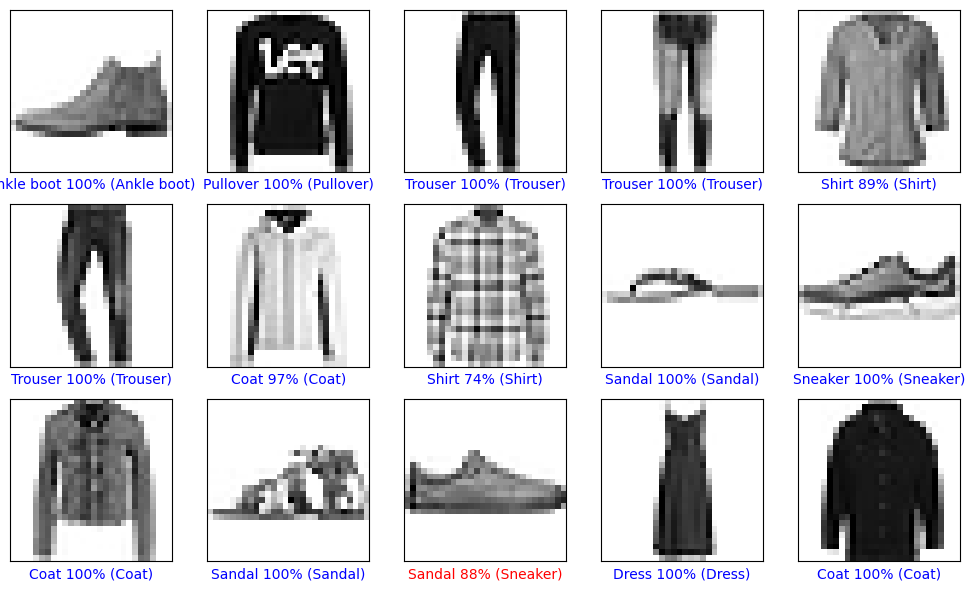

In [38]:
# Predictions by CNNs
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

    
num_images = 15
num_rows = 3  
num_cols = 5  
plt.figure(figsize=(2*num_images, 3))

plt.figure(figsize=(2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)  
    plot_image(i, predictions[i], y_test[i], x_test[i])

plt.tight_layout() 
plt.show()   
# for i in range(10):
#     plt.figure(figsize=(6,3))
#     plt.subplot(1, 2, 1)
#     plot_image(i, predictions[i], y_test[i], x_test[i])
#     plt.show()
    
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions[i], y_test[i], x_test[i])

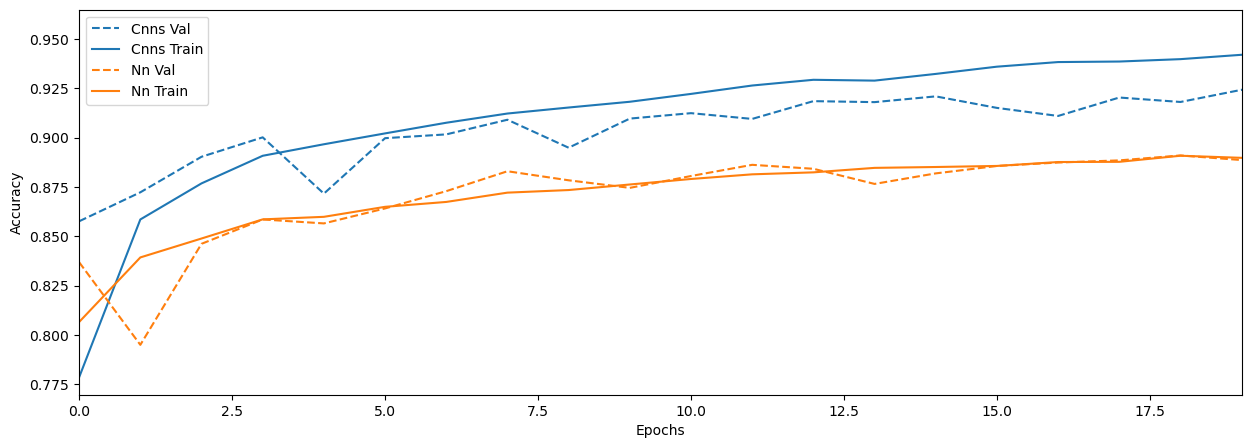

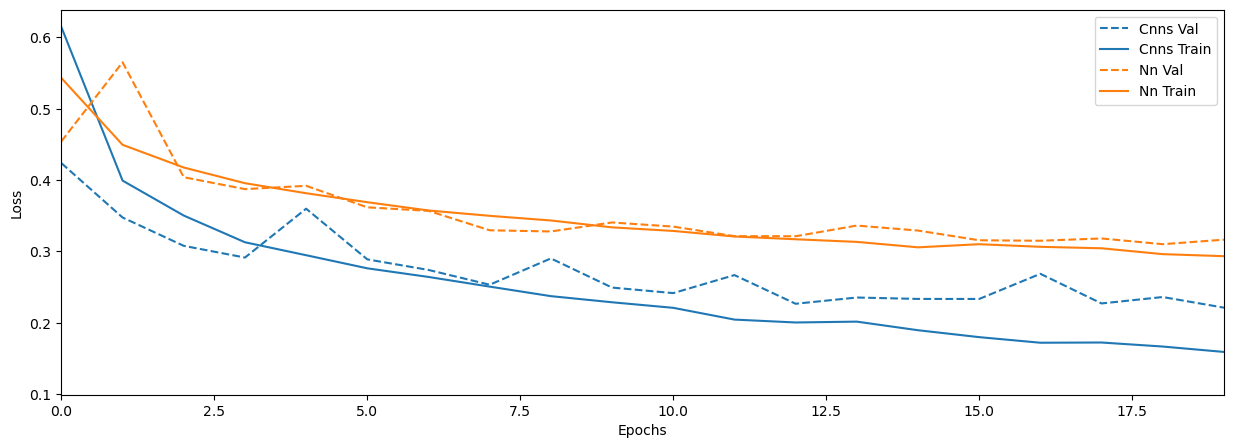

In [45]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('CNNs', history_v1), ('NN', history_v2)], key='accuracy')
plot_history([('CNNs', history_v1), ('NN', history_v2)], key='loss')

__Висновки:__

CNNs модель показала не погані результати 92.07% accuracy, також вгадала 14 речей з 15 на другому графіку. В попередньому завдання для повнозєязної нейронної мережі вдалось досягти точності лише 87.98%. CNNs модель продемонструвала високу точність класифікації на тестовому наборі даних, що підтверджує її ефективність та потенціал для застосування в реальних умовах. Отже, згорткові нейронні мережі є більш ефективними для обробки зображень.